In [1]:
#mounting drive to allow access to data folders contained within drive
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Importation
dataset = pd.read_csv("flavors_of_cacao.csv")

def pre_processing(dataset):
 
    #Renaming the columns
    dataset.columns = ['Company', 'Specific_Bean_Origin', 'REF', 'Review_Date', 'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Orgin']
    # print(dataset.shape)

    #Checking dataset information
    # dataset.info()

    #handling missing values
    dataset= dataset.replace('?', np.NaN)
    missing = dataset.isnull().sum()
    # print(missing)
    dataset.fillna('UNKNOWN',inplace=True)
    print(dataset.isnull().sum())

    #Checking dataset after handling missing values
    print(dataset.shape)

    #Making dataset values understandable by python
    dataset['Company']=dataset['Company'].astype('category')
    dataset['Cocoa_Percentage']=(dataset['Cocoa_Percentage']).str.replace('%', ' ')
    dataset['Cocoa_Percentage']=(dataset['Cocoa_Percentage']).astype(float)

    # dataset.head()
    return dataset

dataset = pre_processing(dataset)

Company                 0
Specific_Bean_Origin    0
REF                     0
Review_Date             0
Cocoa_Percentage        0
Company_Location        0
Rating                  0
Bean_Type               0
Broad_Bean_Orgin        0
dtype: int64
(1795, 9)


In [3]:
dataset

,Company,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Orgin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


In [4]:
# Check spaces in instances

for col in dataset.columns:
    print(dataset['Broad_Bean_Orgin'].value_counts())

Venezuela               214
Ecuador                 193
Peru                    165
Madagascar              145
Dominican Republic      141
                       ... 
Ecuador, Mad., PNG        1
Venezuela, Dom. Rep.      1
Trinidad, Ecuador         1
Martinique                1
Ecuador, Costa Rica       1
Name: Broad_Bean_Orgin, Length: 101, dtype: int64
Venezuela               214
Ecuador                 193
Peru                    165
Madagascar              145
Dominican Republic      141
                       ... 
Ecuador, Mad., PNG        1
Venezuela, Dom. Rep.      1
Trinidad, Ecuador         1
Martinique                1
Ecuador, Costa Rica       1
Name: Broad_Bean_Orgin, Length: 101, dtype: int64
Venezuela               214
Ecuador                 193
Peru                    165
Madagascar              145
Dominican Republic      141
                       ... 
Ecuador, Mad., PNG        1
Venezuela, Dom. Rep.      1
Trinidad, Ecuador         1
Martinique                1
Ecua

# Iva continuing

We wish to find out: <br> :) <br>

**Rating**
1. Which countries produced the most chocolate brands in this study? -done
2. Which companies produce best rated chocolate? -done
3. What's the average rating of chocolate in different countries? -done
4. Rating movement over years -done


**Cocoa Percentage**
5. Correlation between cocoa percentage and rating -done
6. What cocoa percentage countries produce the most (mode)? -to do
7. Cocoa percentage over years -done

**Broad_Bean_Orgin**
8. 

**Ireland**
9. Which chocolate brand has the best rating in Ireland?
10. Rating over years in Ireland
11. Bean origins in Ireland
12. Producers in Ireland

**Most importantly...**  <br>
Which one is THE best? - to do

## Descriptives

In [5]:
dataset.dtypes

Company                 category
Specific_Bean_Origin      object
REF                        int64
Review_Date                int64
Cocoa_Percentage         float64
Company_Location          object
Rating                   float64
Bean_Type                 object
Broad_Bean_Orgin          object
dtype: object

In [6]:
dataset.describe(include = 'all')

,Company,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Orgin
count,1795,1795,1795.000000,1795.000000,1795.000000,1795,1795.000000,1795,1795
unique,416,1039,NaN,NaN,NaN,60,NaN,42,101
top,Soma,Madagascar,NaN,NaN,NaN,U.S.A.,NaN,,Venezuela
freq,47,57,NaN,NaN,NaN,764,NaN,887,214
mean,NaN,NaN,1035.904735,2012.325348,71.698329,NaN,3.185933,NaN,NaN
std,NaN,NaN,552.886365,2.927210,6.323118,NaN,0.478062,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,42.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,576.000000,2010.000000,70.000000,NaN,2.875000,NaN,NaN
50%,NaN,NaN,1069.000000,2013.000000,70.000000,NaN,3.250000,NaN,NaN
75%,NaN,NaN,1502.000000,2015.000000,75.000000,NaN,3.500000,NaN,NaN


In [7]:
print("Dataset contains no. of different companies: ",dataset['Company'].nunique())
print("Dataset contains no. of different company locations: ",dataset['Company_Location'].nunique())
print("Dataset contains no. of different bean origin locales - specific: ",dataset['Specific_Bean_Origin'].nunique())
print("Dataset contains no. of different years: ",dataset['Review_Date'].nunique())
print("Dataset contains years range from ",dataset['Review_Date'].min(), "to ", dataset['Review_Date'].max())
print("Dataset contains the range of cocoa pct between ",dataset['Cocoa_Percentage'].min(), " and ",  dataset['Cocoa_Percentage'].max()) #cleaning needed
print("Dataset contains the range of Rating between ",dataset['Rating'].min(), " and ",  dataset['Rating'].max())

Dataset contains no. of different companies:  416
Dataset contains no. of different company locations:  60
Dataset contains no. of different bean origin locales - specific:  1039
Dataset contains no. of different years:  12
Dataset contains years range from  2006 to  2017
Dataset contains the range of cocoa pct between  42.0  and  100.0
Dataset contains the range of Rating between  1.0  and  5.0


In [8]:
dataset['Broad_Bean_Orgin'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

In [9]:
dataset['Cocoa_Percentage'] = dataset['Cocoa_Percentage'] / 100.0
dataset['Cocoa_Percentage'].sort_values(ascending=True).unique()
print("Dataset contains the range of cocoa pct between ",dataset['Cocoa_Percentage'].min(), " and ",  dataset['Cocoa_Percentage'].max()) #[51] cleaning done

Dataset contains the range of cocoa pct between  0.42  and  1.0


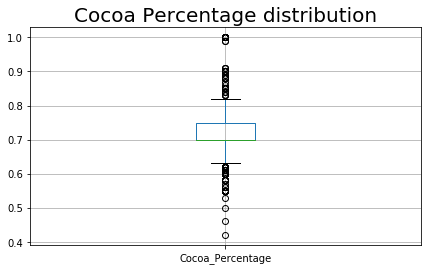

In [10]:
num_cols = ['Cocoa_Percentage']
plt.figure(figsize=(7,4))
dataset[num_cols].boxplot()
plt.title("Cocoa Percentage distribution", fontsize=20)
plt.show()

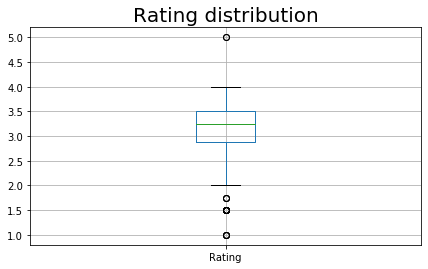

In [11]:
num_cols = ['Rating']
plt.figure(figsize=(7,4))
dataset[num_cols].boxplot()
plt.title("Rating distribution", fontsize=20)
plt.show()


# Rating

## 1. Which countries produced the most chocolate brands in this study?

Top Chocolate Producing Countries in the World
U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: Company_Location, dtype: int64


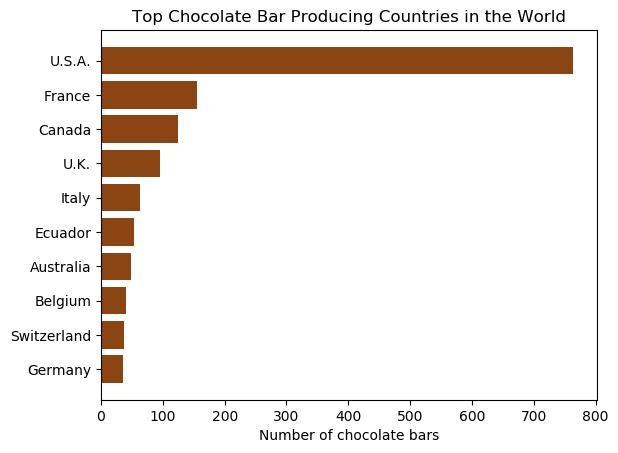

<Figure size 640x480 with 0 Axes>

In [12]:
print ('Top Chocolate Producing Countries in the World')
country=list(dataset['Company_Location'].value_counts().head(10).index)
choco_bars=list(dataset['Company_Location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(dataset['Company_Location'].value_counts().head())

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(country, choco_bars, align='center', color='saddlebrown')
ax.set_yticks(country)
ax.set_yticklabels(country)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of chocolate bars')
title = "Top Chocolate Bar Producing Countries in the World"
ax.set_title(title)
plt.show()
plt.savefig(title + '.png')

## 2. What's the average rating of chocolate in different countries?

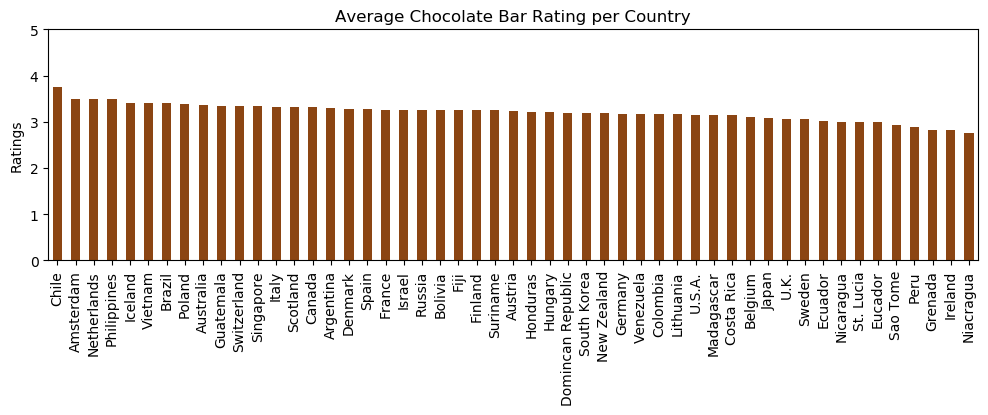

In [13]:
rating_mean = dataset.groupby(['Company_Location'])['Rating'].mean().sort_values(ascending=False)
mean_desc=rating_mean.sort_values(ascending=False)
top_50_countries=mean_desc[:51]
top_50_countries.head(51)
plt.figure(figsize=(12,3))
title="Average Chocolate Bar Rating per Country"
plt.title(title)
top_50_countries.plot.bar(color="saddlebrown")
plt.xlabel('')
plt.ylabel('Ratings')
plt.ylim(0,5)
plt.savefig(title)

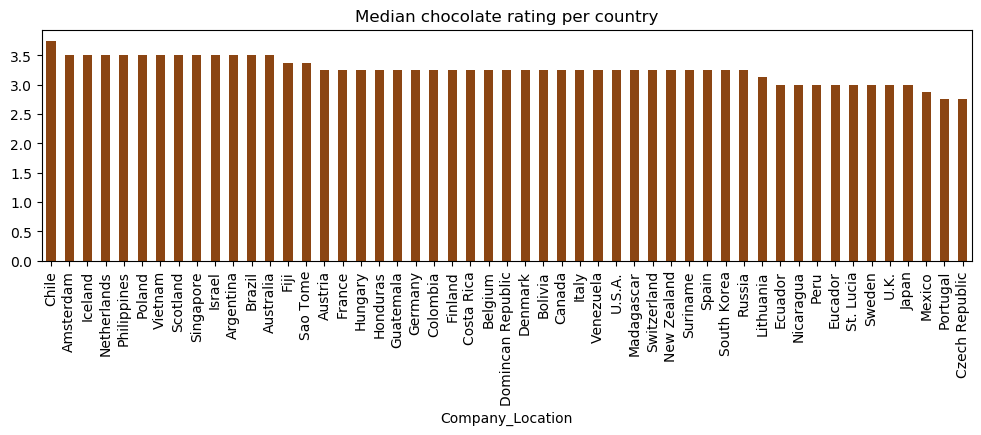

In [14]:
rating_med = dataset.groupby(['Company_Location'])['Rating'].median().sort_values(ascending=False)
med_desc=rating_med.sort_values(ascending=False)
top_50_countries_med=med_desc[:51]
top_50_countries_med.head(51)
plt.figure(figsize=(12,3))
plt.title("Median chocolate rating per country")
top_50_countries_med.plot.bar(color="saddlebrown")

## 3. Which companies produce best rated chocolate?

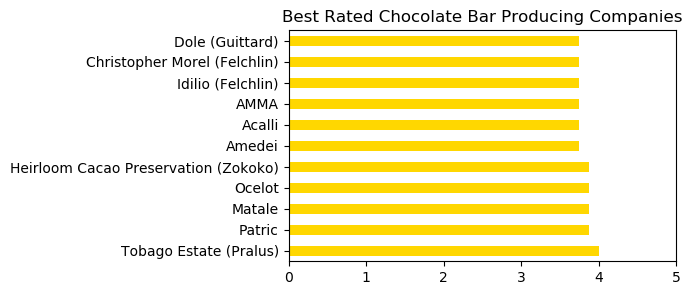

In [15]:
rating_median = dataset.groupby(['Company'])['Rating'].median().sort_values(ascending=False)
median_desc=rating_median.sort_values(ascending=False)
top_10_comp=median_desc[:11]
top_10_comp.head(11)
plt.figure(figsize=(5,3))
title="Best Rated Chocolate Bar Producing Companies"
plt.title(title)
top_10_comp.plot.barh(color="gold")
plt.ylabel('')
plt.xlim(0,5)
plt.savefig(title)

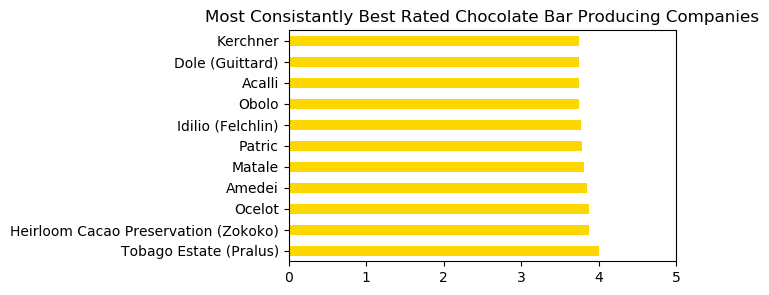

In [16]:
rating_mean = dataset.groupby(['Company'])['Rating'].mean().sort_values(ascending=False)
mean_desc=rating_mean.sort_values(ascending=False)
top_10_comp=mean_desc[:11]
top_10_comp.head(11)
plt.figure(figsize=(5,3))
title = "Most Consistantly Best Rated Chocolate Bar Producing Companies"
plt.title(title)
top_10_comp.plot.barh(color="gold")
plt.ylabel('')
plt.xlim(0,5)
plt.savefig(title)

## 4. Rating movement over years

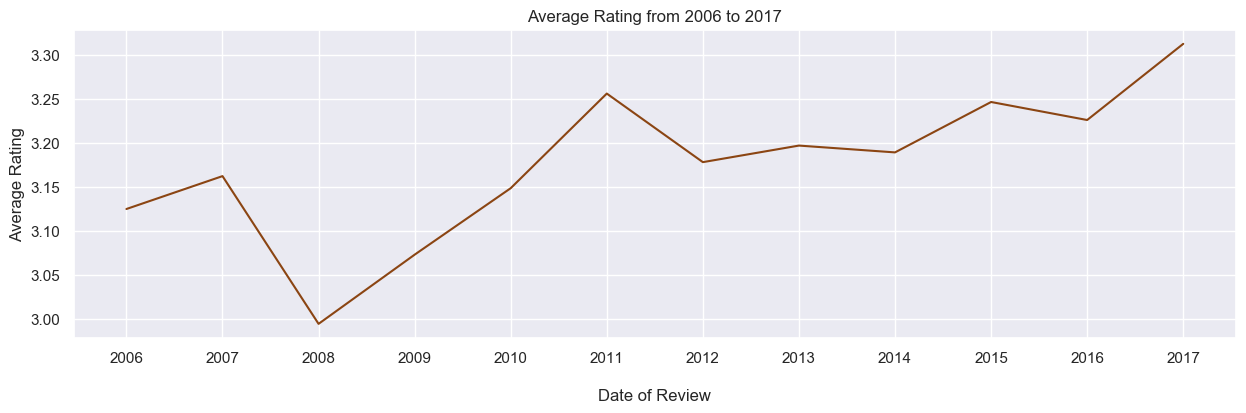

<Figure size 640x480 with 0 Axes>

In [17]:

over_years = dataset.groupby('Review_Date').aggregate({'Rating':'mean'})
over_years = over_years.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_Date', y='Rating', data=over_years, color='saddlebrown')
ax.set(xticks=over_years.Review_Date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
title = "Average Rating from 2006 to 2017"
plt.title(title)
plt.show()
plt.savefig(title)

# Cocoa Percentage

## 5. Correlation between cocoa percentage and rating

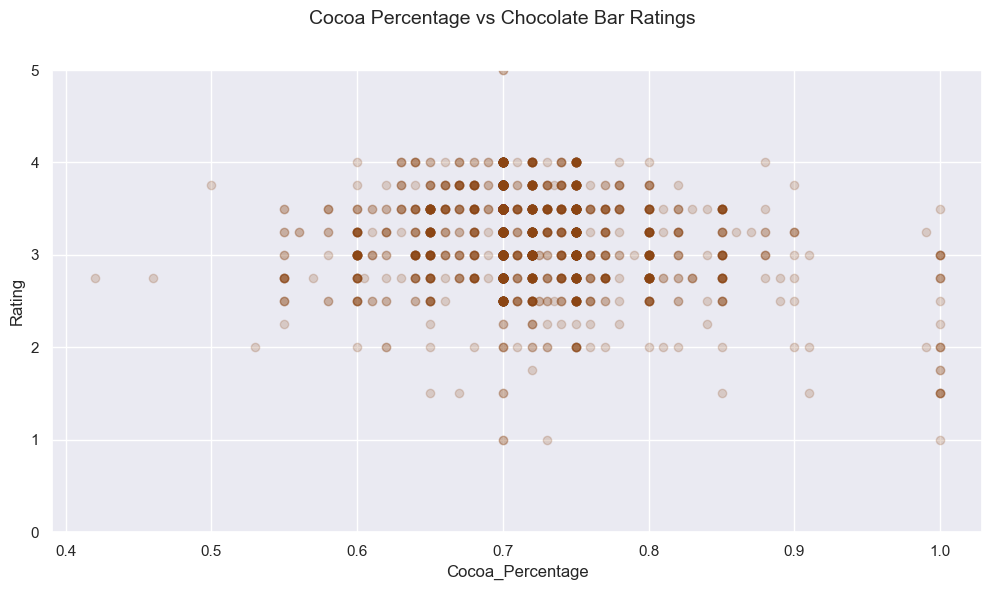

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(12,6))
plt.xlabel("Cocoa_Percentage", fontsize=12)
plt.ylabel("Rating", fontsize=12)
title="Cocoa Percentage vs Chocolate Bar Ratings"
plt.suptitle(title, fontsize= 14)
plt.plot(dataset.Cocoa_Percentage, dataset['Rating'], 'bo', alpha=0.2, color='saddlebrown')
plt.ylim(0, 5)
plt.show()
plt.savefig(title)

Negative correlation between cocoa percentage and rating.

In [19]:
dataset.corr()[['Cocoa_Percentage', 'Rating']]

,Cocoa_Percentage,Rating
REF,0.037791,0.101030
Review_Date,0.038177,0.099846
Cocoa_Percentage,1.000000,-0.164820
Rating,-0.164820,1.000000


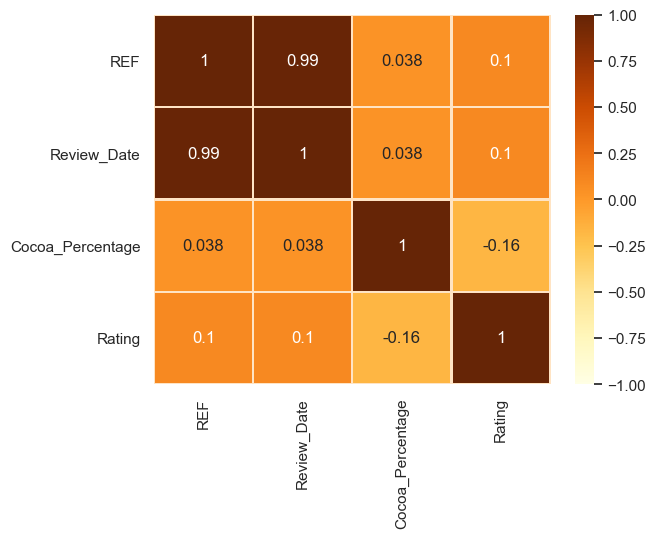

In [20]:
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, linewidth=1 , linecolor='bisque', cmap="YlOrBr")
title = "Heatmap"
plt.savefig(title)

## 6. What cocoa percentage countries produce the most? 

In [21]:
coc_loc_top_10 = dataset.groupby(['Company_Location']).median().reset_index()[['Company_Location','Cocoa_Percentage']].sort_values(by='Cocoa_Percentage', ascending=False)[:10]

In [22]:
coc_loc_top_10

,Company_Location,Cocoa_Percentage
59,Wales,0.800
20,Ghana,0.800
45,Sao Tome,0.775
42,Portugal,0.760
16,Fiji,0.760
15,Eucador,0.750
37,Niacragua,0.750
27,Ireland,0.750
23,Honduras,0.750
58,Vietnam,0.740


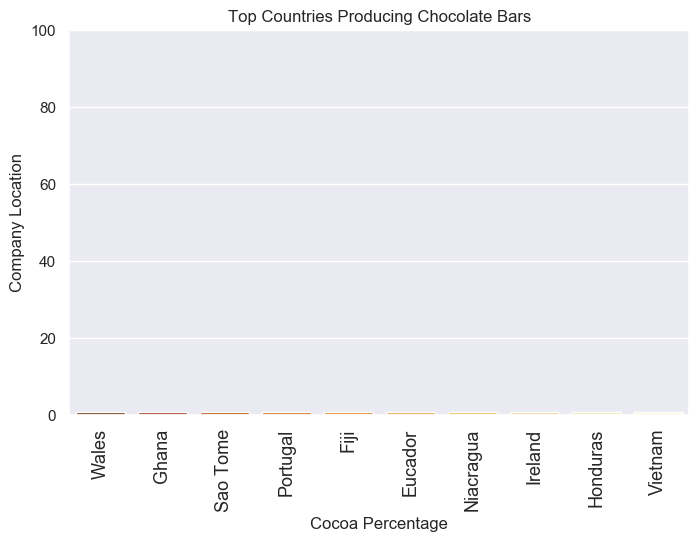

In [23]:
plt.figure(figsize=[8,5])
sns.barplot(x=coc_loc_top_10['Company_Location'], y=coc_loc_top_10['Cocoa_Percentage'], data=coc_loc_top_10, palette='YlOrBr_r')
plt.xticks(rotation=90)
plt.xlabel('Cocoa Percentage', fontsize=12)
plt.ylabel('Company Location', fontsize=12)
plt.xticks(fontsize=13)
plt.ylim(0,100, 20)
title="Top Countries Producing Chocolate Bars"
plt.title(title)
plt.savefig(title)

## 7. Average cocoa percentage over years



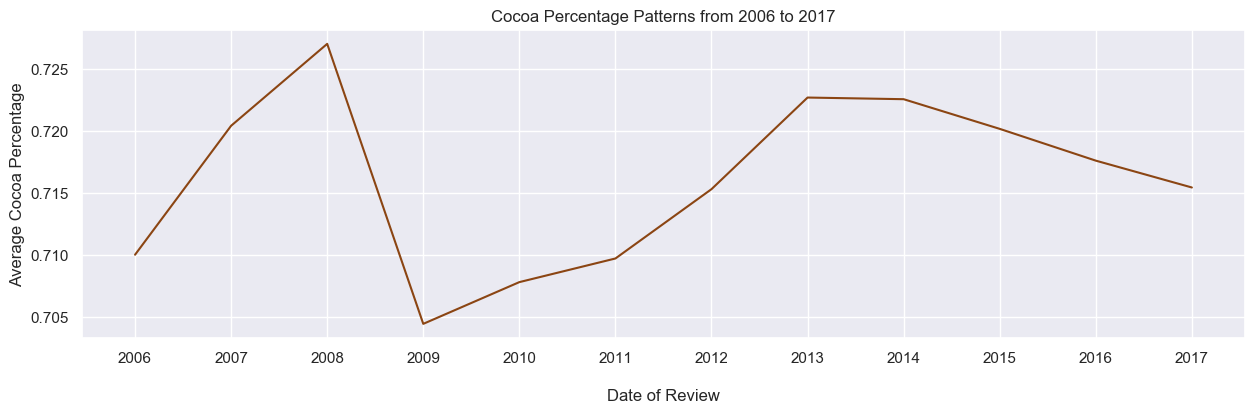

<Figure size 640x480 with 0 Axes>

In [24]:
years_cp = dataset.groupby('Review_Date').aggregate({'Cocoa_Percentage':'mean'})
years_cp = years_cp.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_Date', y='Cocoa_Percentage', data=years_cp, color="saddlebrown")
ax.set(xticks=years_cp.Review_Date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
title = "Cocoa Percentage Patterns from 2006 to 2017"
plt.title(title)
plt.show()
plt.savefig(title)

Year 2008 had the highest average cocoa percentage and at the same time the lowest average rating recorded (fig. Rating 4.)

## Bean Type

In [25]:
dataset['Bean_Type'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Beniano                       3
Nacional (Arriba)             3
EET                           3
Matina                        3
Amazon mix                    2
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Criollo (Amarru)              2
Forastero (Catongo)           2
Criollo, Forastero            2
Nacional                      2
Trinitario, Forastero         2
Criollo (Ocumare 61)          2
Criollo, +                    1
Forastero (Arriba) ASSS       1
Criollo (Wild)                1
Criollo (Ocumare 77)          1
Forastero(Arriba, CCN)        1
Criollo (Ocumare 67)          1
Foraster

In [26]:
## Clean Bean Type

import string

def clean_bean_type(bean_type_text):
    # print(bean_type_text)
    if bean_type_text.strip() is '':
        return 'UNKNOWN'
    list_bean_type = ['trinitario', 'criollo', 'forastero']
    # remove punctuation
    cleaned_text = ''.join([char for char in bean_type_text.lower() if char not in string.punctuation])
    count = 0
    bean_type = None
    for each_word in cleaned_text.split(' '):
        if each_word in list_bean_type:
            bean_type=each_word
            count += 1
    # print(count)
    if count == 1:
        return bean_type.upper()
    elif count > 1 or 'BLEND' in cleaned_text.upper():
        return 'BLEND'
    else:
        return 'OTHER/UNKNOWN'
    
dataset['Bean_Type_Cleaned'] = dataset['Bean_Type'].apply(lambda x: clean_bean_type(x))

In [27]:
# Test Conversion

bean_type_count_df = pd.DataFrame(dataset['Bean_Type_Cleaned'].value_counts())
bean_type_count_df['Bean_Type_Cleaned'].sum() == len(dataset)

True

In [28]:
bean_type_count_df

,Bean_Type_Cleaned
UNKNOWN,887
TRINITARIO,423
FORASTERO,194
CRIOLLO,172
BLEND,97
OTHER/UNKNOWN,22


In [29]:
bean_type_count_df['Bean_Type_Percentage'] = bean_type_count_df['Bean_Type_Cleaned'] * 100 / len(dataset)
bean_type_count_df

,Bean_Type_Cleaned,Bean_Type_Percentage
UNKNOWN,887,49.415042
TRINITARIO,423,23.565460
FORASTERO,194,10.807799
CRIOLLO,172,9.582173
BLEND,97,5.403900
OTHER/UNKNOWN,22,1.225627


## Observation:

#### Percentages of bean_type distribution

23.5% of the dataset is trinitario, 10.8% is forastero and 9.5% is criollo.

## 8. Average Rating of Trinitario, Forestaro and Criollo 

Text(0.5, 0, 'Chocolate Bar Rating')

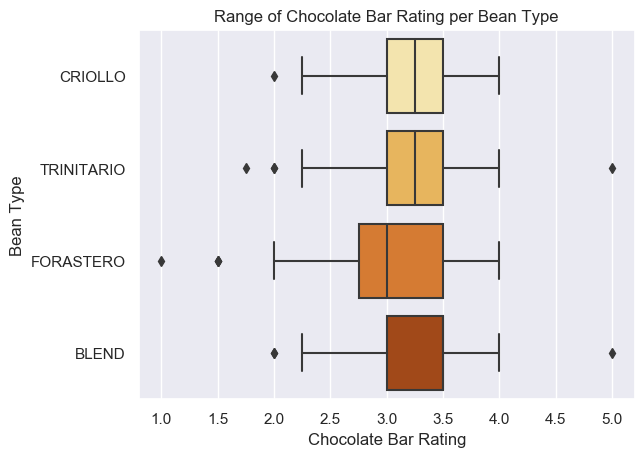

In [30]:
list_bean_type = ['TRINITARIO', 'CRIOLLO', 'FORASTERO', 'BLEND']

sns.boxplot(x='Rating',y='Bean_Type_Cleaned', data=dataset[dataset['Bean_Type_Cleaned'].isin(list_bean_type)], palette='YlOrBr')
plt.title('Range of Chocolate Bar Rating per Bean Type')
plt.ylabel('Bean Type')
plt.xlabel('Chocolate Bar Rating')

In [31]:
# Why is there no median line for blend?
dataset['Rating'][dataset['Bean_Type_Cleaned']=='BLEND'].median()

3.5

The median coincides with Q3.

Observations:

1. 'Trinitario' bagged full marks on rating and 'BLEND' as well. Distributions of Criollo and Trinitaro look similar.
2. Forastero has the longest spread of ratings. It also has the most share of data. So, makes sense. But doesn't have the highest avg. rating though.
3. The highest median rating belongs to the blend category besides, it also has one of the best rated cocoa.

## 9 Where does the more than average cocoa beans belong to?

i. Which country?

In [32]:
dataset[(dataset['Bean_Type_Cleaned']=='TRINITARIO') & (dataset['Rating']>=3)].groupby('Company_Location').mean().reset_index()[['Company_Location','Rating']]

,Company_Location,Rating
0,Amsterdam,3.375000
1,Argentina,3.500000
2,Australia,3.450000
3,Austria,3.500000
4,Belgium,3.638889
5,Brazil,3.500000
6,Canada,3.500000
7,Colombia,3.250000
8,Ecuador,3.000000
9,Fiji,3.416667


In [33]:
list_bean_type

['TRINITARIO', 'CRIOLLO', 'FORASTERO', 'BLEND']

In [34]:
test_lost = ['TRINITARIO']

TRINITARIO


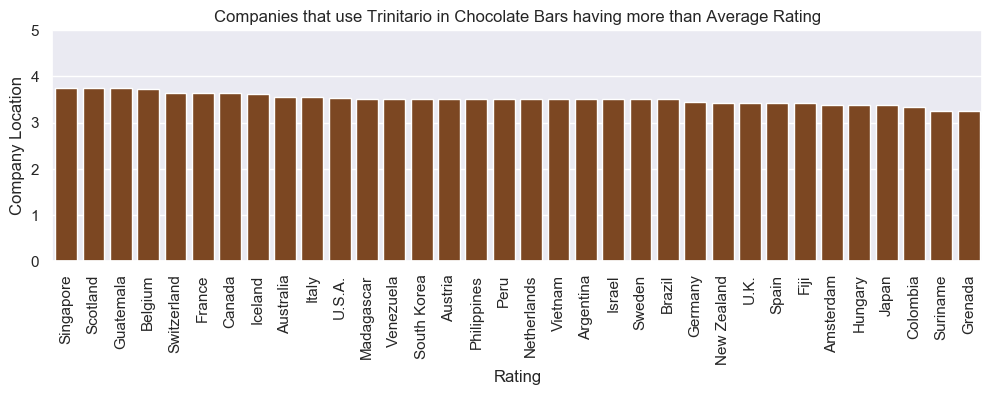

CRIOLLO


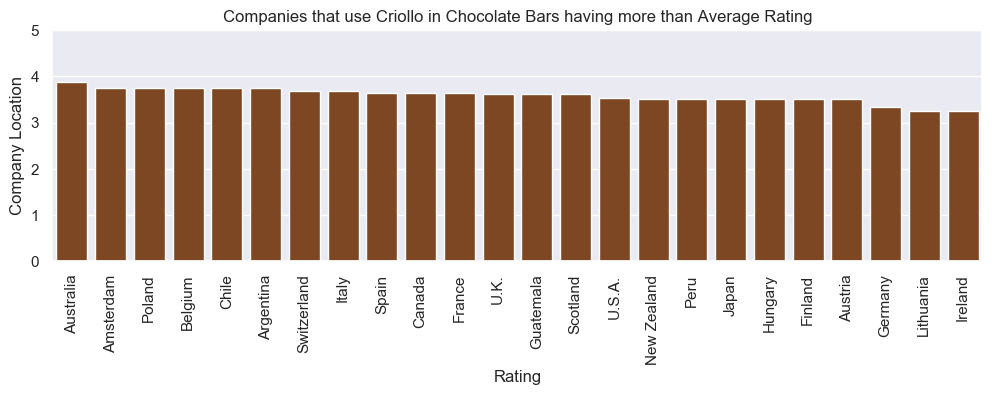

FORASTERO


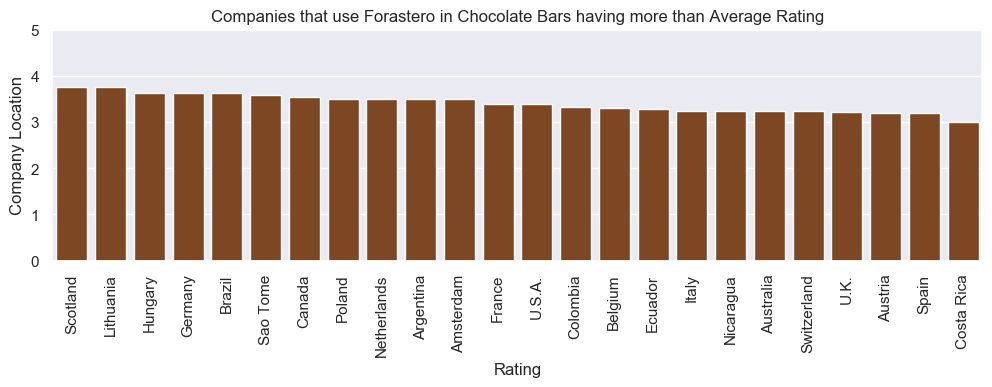

BLEND


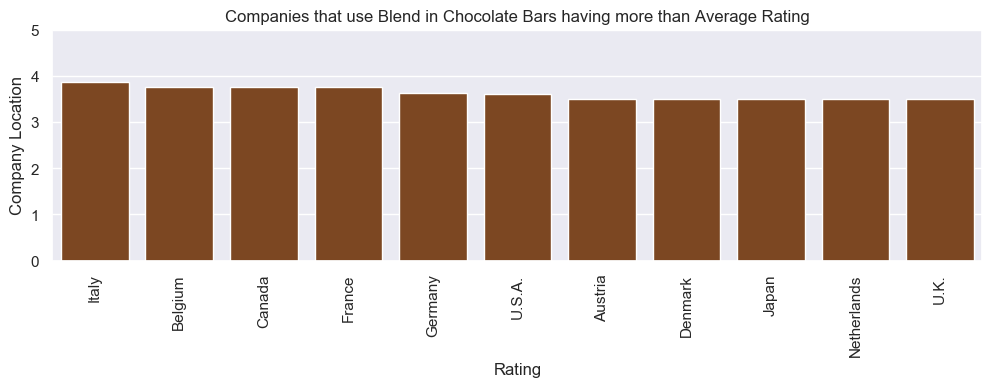

In [35]:
for each_bean_type in list_bean_type:
    print(each_bean_type)
    rating_median=dataset['Rating'][dataset['Bean_Type_Cleaned']==each_bean_type].median()
    temp_data=dataset[(dataset['Bean_Type_Cleaned']==each_bean_type) & (dataset['Rating']>=rating_median)].groupby('Company_Location').mean().sort_values(by='Rating' ,ascending=False).reset_index()[['Company_Location','Rating']]
    countries_list = temp_data['Company_Location']
    ratings_list = temp_data['Rating']
    plt.figure(figsize=(12,3))
    sns.barplot(x=countries_list, y=ratings_list ,color="saddlebrown")
    plt.ylim(0,5)
    plt.title('Companies that use ' + each_bean_type.title() + ' in Chocolate Bars having more than Average Rating')
    plt.xticks(rotation=90)
    plt.xlabel('Rating')
    plt.ylabel('Company Location')
    plt.show()